#Assignment 3:
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

my usual imports and setups

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


I am using Dec. 2014, Jan. 2015 and Feb. 2015 for winter months, Jun., Jul., and Aug. 2015 for summer.

In [2]:
#df_W=pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201501-citibike-tripdata.csv')
#print df_W.columns
#df_S=pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201506-citibike-tripdata.csv')

dec=pd.read_csv('201412-citibike-tripdata.csv')
jan=pd.read_csv('201501-citibike-tripdata.csv')
feb=pd.read_csv('201502-citibike-tripdata.csv')
Win=[dec,jan,feb]

jun=pd.read_csv('201506-citibike-tripdata.csv')
jul=pd.read_csv('201507-citibike-tripdata.csv')
aug=pd.read_csv('201508-citibike-tripdata.csv')
Sum=[jun,jul,aug]

df_W=pd.concat(Win, axis = 0, ignore_index = True)
df_S=pd.concat(Sum, axis = 0, ignore_index = True)
print df_W.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


## get the age like we did before, subscribers only cause otherwise the ages are really sparse anyways


In [3]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

lets split age in 10 year bins. see the comment in assignment 1 about this

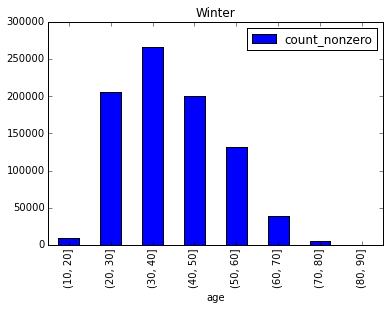

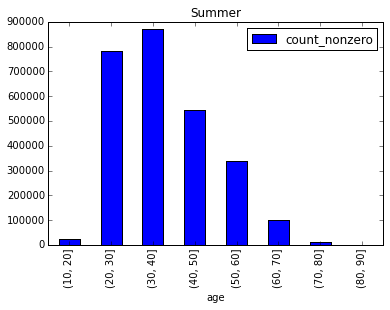

In [4]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
    

It appears that most riders for both seasons are between ages 30 - 40. I expect the it cannot reject the null hypothesis that the distributions are the same.

lets run the scipy KS test

#KS testsfor goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [5]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, normal fit (0.99999880158020016, 0.0)
summer, normal fit (0.99999963442994877, 0.0)


the scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

In [6]:
#compare to gamma
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)


or i can create my function separately, then call it: all i need to do is define a function that calls  like i am doing below. the size argument must come first, and the second argument of kstest will no longer be a string, but the function itself (what we would call a "callable")

In [7]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [8]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1066635675.0, nan)
summer, normal fit (325371025.0, nan)


KS Null:  G(x)=F(x)

##TODO FOR YOU!

-- repeat with the AD test, and/or any other tests you wish

-- do you see differences in the sample? significant differences?

-- do you dare (and this is indeed optional but could be fun) splitting the samples by up- and down-town?

# AD test

In [9]:
adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='norm')
print "Winter, normal fit", adW

adS=scipy.stats.anderson(S_age_dist['count_nonzero'], dist='norm')
print "Summer, normal fit", adS

Winter, normal fit (0.51257652802639697, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Summer, normal fit (0.51294415781601543, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [10]:
thresholdW = adW[1][adW[2]==[1.0]]
print "Winter AD: ", adW
print "Winter threshold: ", thresholdW

thresholdS = adS[1][adS[2]==[1.0]]
print "Summer AD: ", adS
print "Summer threshold: ", thresholdS

Winter AD:  (0.51257652802639697, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Winter threshold:  [ 0.984]
Summer AD:  (0.51294415781601543, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Summer threshold:  [ 0.984]


# The AD test statistics is lower than the thresholds 0.984 at the critical values.

# If the statistics value is larger than the critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected.

# In this case, it is lower therefore we fail to reject the null hypothesis that both distributions are drawn from normal distributions.

In [11]:
#compare to exponential
adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='expon')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], dist='expon')

print "winter, normal fit", adW
print "summer, normal fit", adS

#reject

winter, normal fit (1.4600702106382197, array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit (1.6838616649191742, array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [12]:
W_age_dist.describe()

,count_nonzero
count,8.000000
mean,107092.000000
std,107131.217174
min,223.000000
25%,8118.750000
50%,85267.500000
75%,201562.750000
max,265608.000000


In [13]:
S_age_dist.describe()

,count_nonzero
count,8.000000
mean,334150.875000
std,358242.701667
min,363.000000
25%,21320.250000
50%,220293.500000
75%,603452.500000
max,870722.000000


# Differences

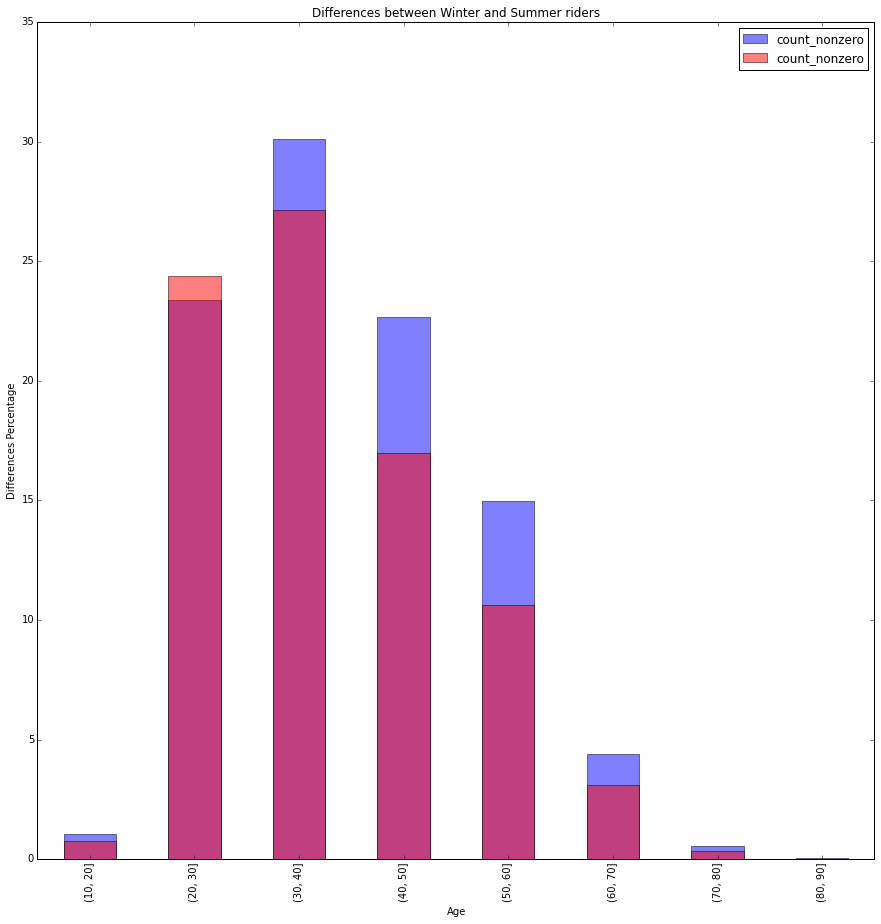

In [14]:
W = (W_age_dist/len(df_W))*100
S = (S_age_dist/len(df_S))*100

fig = plt.figure(figsize(15,15))
Ax = plt.subplot(111)
W.plot(kind="bar", color="blue", alpha = 0.5, ax=Ax, label="Winter")
S.plot(kind="bar", color="red", alpha = 0.5, ax=Ax, label="Summer")
pl.xlabel('Age')
pl.ylabel('Differences Percentage')
pl.title('Differences between Winter and Summer riders')

In [15]:
dW=df_W.age[~np.isnan(df_W.age)]
dS=df_S.age[~np.isnan(df_S.age)]

ks=scipy.stats.ks_2samp(dW, dS)
ks

(0.068406909486311618, 0.0)

This tests whether 2 samples are drawn from the same distribution. If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same. Because he p-value is small - 0, this implies we reject the null. 

# Extra Credit
## Boroughs by start station latitude and longitude
Uptown: Lat: > 40.7127 Long: > 74.0059

Downtown: Lat: < 40.7127 Long: < 74.0059

In [16]:
df_W['uptownW'] = (df_W['start station latitude'] >= 40.7127) & (df_W['start station longitude'] >= 74.0059)
df_S['uptownS'] = (df_S['start station latitude'] >= 40.7127) & (df_S['start station longitude'] >= 74.0059)

df_W['downW'] = (df_W['start station latitude'] < 40.7127) & (df_W['start station longitude'] < 74.0059)
df_S['downS'] = (df_S['start station latitude'] > 40.7127) & (df_S['start station longitude'] < 74.0059)

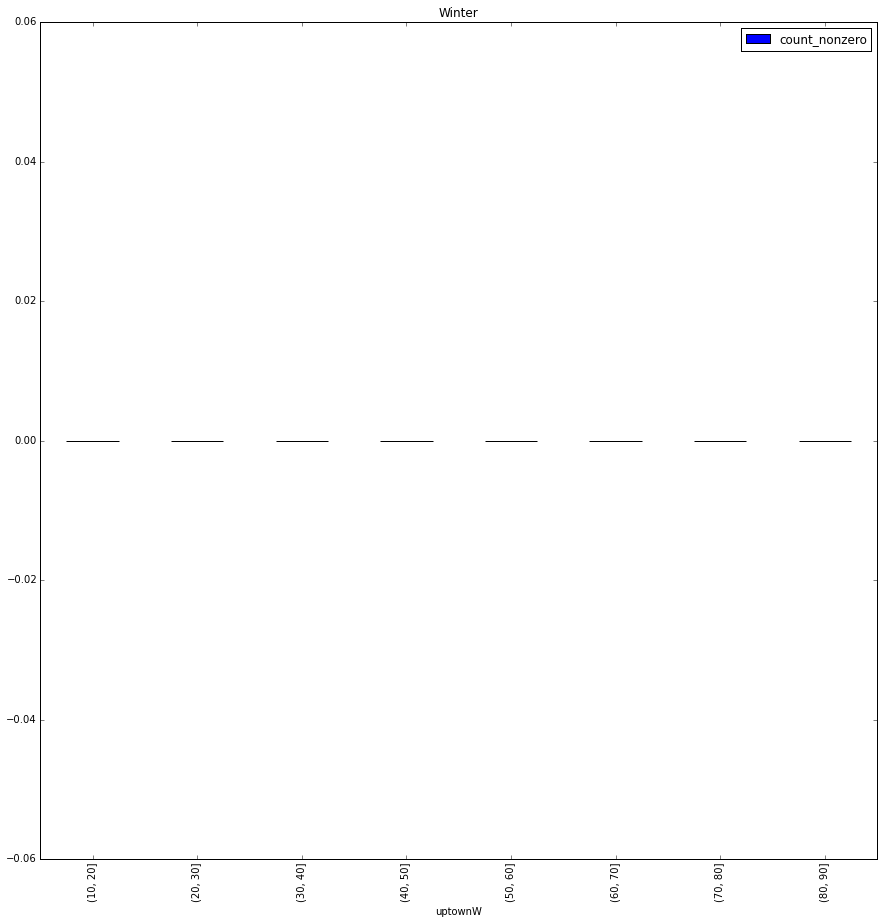

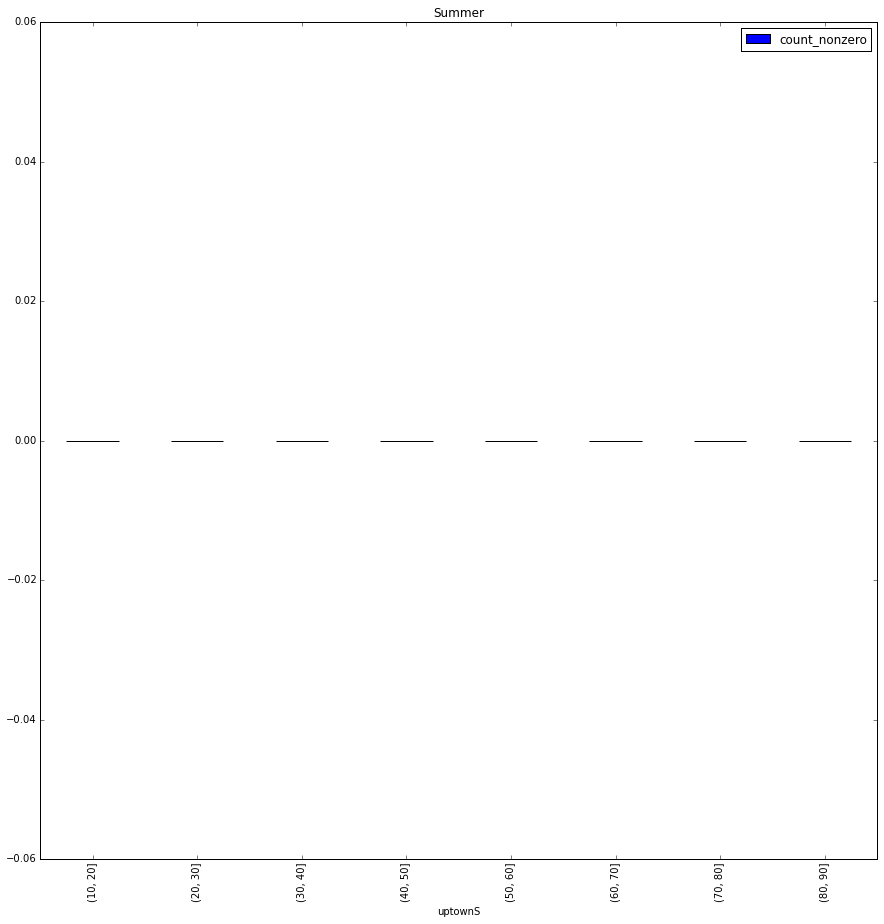

In [17]:
bins = np.arange(10, 99, 10)
df_W.uptownW.groupby(pd.cut(df_W.uptownW, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
uW = df_W.uptownW.groupby(pd.cut(df_W.uptownW, bins)).agg([count_nonzero])

df_S.uptownS.groupby(pd.cut(df_S.uptownS, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
uS = df_S.uptownS.groupby(pd.cut(df_S.uptownS, bins)).agg([count_nonzero])
    